## 1. Importando as bibliotecas

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. Carregando os dados.

In [2]:
dataset = keras.datasets.fashion_mnist

 - Definindo as amostras de treino e teste.

In [3]:
((X_treino, Y_treino), (X_teste, Y_teste)) = dataset.load_data()

##3. Exploração dos dados.

In [4]:
len(X_treino)
X_treino.shape
X_teste.shape
len(Y_teste)

10000

In [5]:
Y_treino.shape

(60000,)

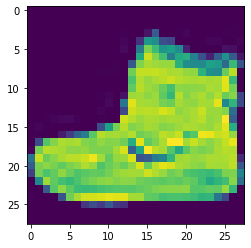

In [6]:
plt.imshow(X_treino[0])

In [7]:
#  verificando o total de classificações
print(Y_treino.min())
print(Y_treino.max())

0
9


 Como pode ser visto acima o total de classficações é igual a 10.

## 4. Visualização dos dados.

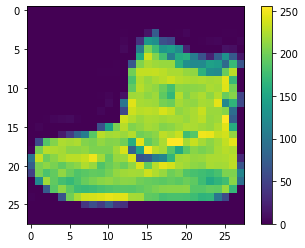

In [8]:
plt.imshow(X_treino[0])
plt.colorbar()

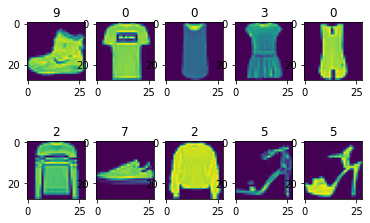

In [9]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(X_treino[imagem])
  plt.title(Y_treino[imagem])

 - Como pode ser observado , números foram usados para identificar cada tipo de roupa.
  ex: vestido = 3, tenis = 7.

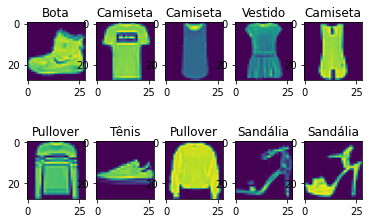

In [10]:
# criou-se a lista com o nome referentes a cada peça, através dos dados fornecidos na documentação
# https://github.com/zalandoresearch/fashion-mnist

nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(X_treino[imagem])
  plt.title(nomes_de_classificacoes[Y_treino[imagem]])

## 5. Criando o modelo.

  - Camada 0.
 
  O array de 2 dimensoes será achatando para que fique apenas com uma dimensão.
 

 - Camada 1.

 É uma camada mais densa(Dense), camada totalmente conectada.
 Todas as unidades da camada 1 fazem conexão com a camada 0.


  - Camada 2.

 Esta terá 10 saídas porque teremos 10 categorias.

 Será utilizada a função softmax para que ela indique qual a probabilidade de pertencer a alguma categoria.

In [11]:
modelo = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(256, activation = tensorflow.nn.relu),
      keras.layers.Dense(10, activation = tensorflow.nn.softmax)

      ])


### 5.1 Compilando e treinando o modelo

In [12]:
modelo.compile(optimizer='adam' , 
               loss='sparse_categorical_crossentropy')

In [13]:
# modelo.fit(imagens_treino, identificacoes_treino, steps_per_epoch=60000)
modelo.fit(X_treino, Y_treino)

Train on 60000 samples
60000/60000 [==============================] - 6s 107us/sample - loss: 3.8864


### 5.2 Normalizando a amostra de treino.

 - Reduzindo o tamanho das imagens, que variam de 0 a 255, para o intervalo de 0 a 1.

In [14]:
X_treino = X_treino/float(255)

 - Aplicando o novo X_treino ao modelo e verificando a perda.

In [15]:
modelo = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(256, activation = tensorflow.nn.relu),
      keras.layers.Dense(10, activation = tensorflow.nn.softmax)

      ])


modelo.compile(optimizer='adam' , 
               loss='sparse_categorical_crossentropy')


modelo.fit(X_treino, Y_treino, epochs= 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4859
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3638
Epoch 3/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3261
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3039
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2837


 - Adicionando camadas ao modelo.

   Essas novas camadas agrupam mais características as imagens.

In [16]:
modelo = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(256, activation = tensorflow.nn.relu),
      keras.layers.Dense(128, activation = tensorflow.nn.relu),
      keras.layers.Dense(64, activation = tensorflow.nn.relu),
      keras.layers.Dense(10, activation = tensorflow.nn.softmax)

      ])


modelo.compile(optimizer='adam' , 
               loss='sparse_categorical_crossentropy',
               metrics= ['accuracy'])


modelo.fit(X_treino, Y_treino, epochs= 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.4829 - accuracy: 0.8268
Epoch 2/5
60000/60000 [==============================] - 11s 175us/sample - loss: 0.3650 - accuracy: 0.8650
Epoch 3/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3338 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3052 - accuracy: 0.8864
Epoch 5/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2898 - accuracy: 0.8918


 - Fazendo as predições e inspecionando o modelo

In [17]:
y_pred = modelo.predict(X_teste)

In [18]:
print('Valor predito :',np.argmax(y_pred[0]))
print('Valor real :',Y_teste[0])

Valor predito : 9
Valor real : 9


 - Testando para outros valores.

In [19]:
print('Valor predito :',np.argmax(y_pred[1]))
print('Valor real :',Y_teste[1])

Valor predito : 2
Valor real : 2


In [20]:
print('Valor predito :',np.argmax(y_pred[10]))
print('Valor real :',Y_teste[10])

Valor predito : 4
Valor real : 4


### 5.3 Avaliando e ajustando o modelo.

In [21]:
modelo.evaluate(X_teste, Y_teste)

10000/10000 [==============================] - 1s 79us/sample - loss: 58.8667 - accuracy: 0.8414


[58.86673209686279, 0.8414]

 Podemos observar que a perda está alta, então devemos ajustar ainda mais o modelo.

 Foi diminuído o número de camadas.
 
 Foi incluída uma camada que permite "adormecer" uma parte dos daos de treino, com o objetivo de encontrar um melhor ajuste.

In [22]:
modelo = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(256, activation = tensorflow.nn.relu),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(10, activation = tensorflow.nn.softmax)

      ])


modelo.compile(optimizer='adam' , 
               loss='sparse_categorical_crossentropy',
               metrics= ['accuracy'])


historico = modelo.fit(X_treino, Y_treino, epochs= 5, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 136us/sample - loss: 0.5282 - accuracy: 0.8125 - val_loss: 0.4116 - val_accuracy: 0.8535
Epoch 2/5
48000/48000 [==============================] - 7s 142us/sample - loss: 0.3985 - accuracy: 0.8550 - val_loss: 0.4057 - val_accuracy: 0.8489
Epoch 3/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.3619 - accuracy: 0.8672 - val_loss: 0.3571 - val_accuracy: 0.8692
Epoch 4/5
48000/48000 [==============================] - 7s 139us/sample - loss: 0.3411 - accuracy: 0.8747 - val_loss: 0.3494 - val_accuracy: 0.8717
Epoch 5/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.3231 - accuracy: 0.8794 - val_loss: 0.3433 - val_accuracy: 0.8744


## 6. Visualização

 - Graficando a acurácia.

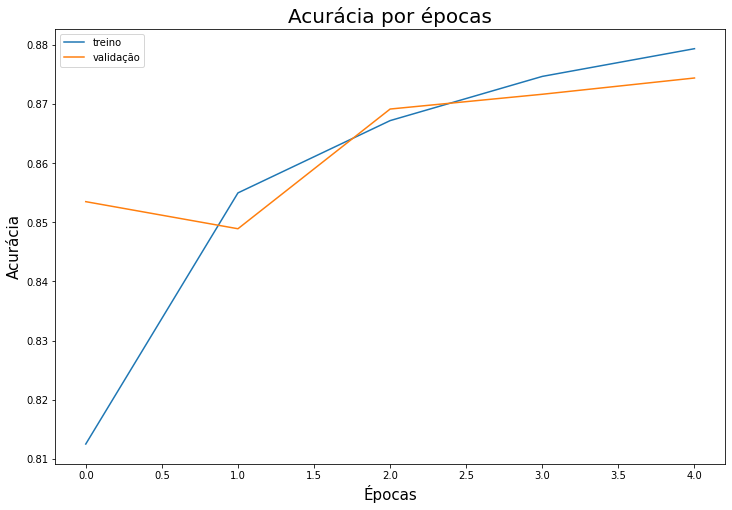

In [23]:
plt.figure(figsize=(12,8))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.legend(['treino','validação'])
plt.show()

 - Graficando a perda.

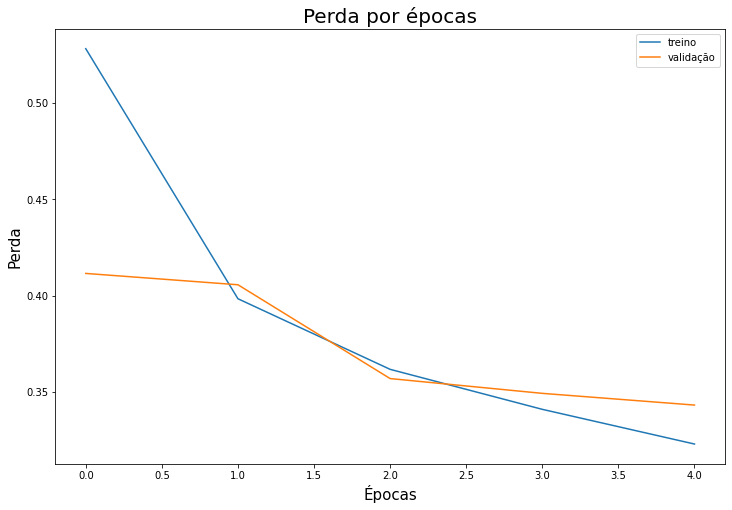

In [24]:
plt.figure(figsize=(12,8))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Perda', fontsize=15)
plt.legend(['treino','validação'])
plt.show()

## 7. Salvando e carregando o modelo treinado.

In [25]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

 - Verificando o modelo salvo.

In [26]:
Y_previsto = modelo.predict(X_teste)
print('resultado teste:', np.argmax(Y_previsto[1]))
print('número da imagem de teste:', Y_teste[1])

Y_previsto_modelo_salvo = modelo_salvo.predict(X_teste)
print('resultado teste modelo salvo:', np.argmax(Y_previsto_modelo_salvo[1]))
print('número da imagem de teste:', Y_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


 - Avaliando o modelo.

In [27]:
perda_teste, acuracia_teste = modelo.evaluate(X_teste, Y_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 1s 72us/sample - loss: 58.8782 - accuracy: 0.8429
Perda do teste: 58.878183354949954
Acurácia do teste: 0.8429
